<a href="https://colab.research.google.com/github/chrisldz/ECON3916-33674-Statistical-Machine-Learning/blob/main/Class%202/Lab_2_Fred_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fredapi

In [3]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='b7f6004f1ff995d6ddb76979acba563f ')

In [4]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [5]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


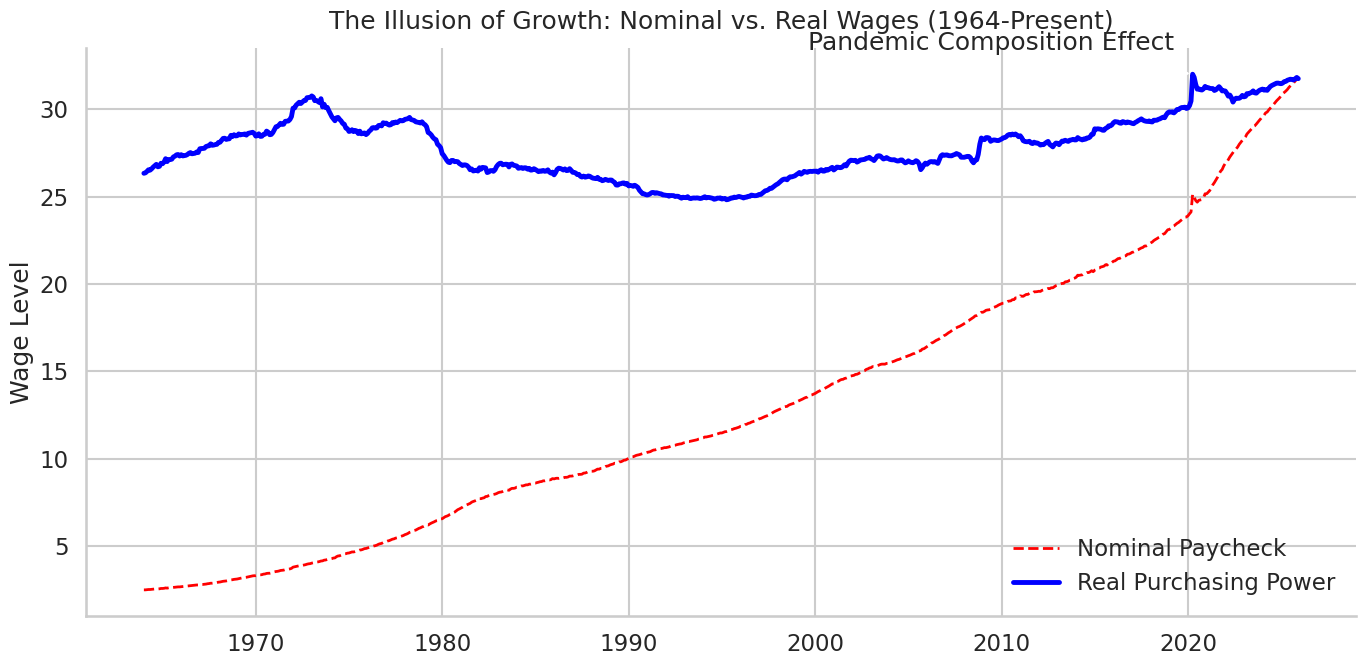

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# --- Ensure time order ---
df = df.sort_index()

fig, ax = plt.subplots(figsize=(14, 7))

# 1–3) Plot both series with required styles
ax.plot(
    df.index, df["Nominal_Wage"],
    linestyle="--", linewidth=2, color="red",
    label="Nominal Paycheck"
)
ax.plot(
    df.index, df["Real_Wage"],
    linestyle="-", linewidth=3.5, color="blue",
    label="Real Purchasing Power"
)

# 4) Title
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", pad=14)
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

# Legend
ax.legend(frameon=False, loc="best")

# 5) Annotation to 2020 spike in Real Wages
# Find the highest Real_Wage point within 2020 (works for daily/monthly/quarterly data)
mask_2020 = (df.index >= pd.Timestamp("2020-01-01")) & (df.index <= pd.Timestamp("2020-12-31"))
if mask_2020.any():
    real_2020 = df.loc[mask_2020, "Real_Wage"].dropna()
    if not real_2020.empty:
        spike_date = real_2020.idxmax()
        spike_value = real_2020.loc[spike_date]

        # Place text a bit up-left of the spike (robust across scales)
        y_span = (df["Real_Wage"].max() - df["Real_Wage"].min())
        y_offset = 0.15 * y_span if y_span != 0 else 1

        ax.annotate(
            "Pandemic Composition Effect",
            xy=(spike_date, spike_value),
            xytext=(spike_date - pd.Timedelta(days=365), spike_value + y_offset),
            arrowprops=dict(arrowstyle="->", linewidth=1.5),
            ha="right", va="bottom"
        )

# Clean up spines + layout
sns.despine(ax=ax)
fig.tight_layout()
plt.show()


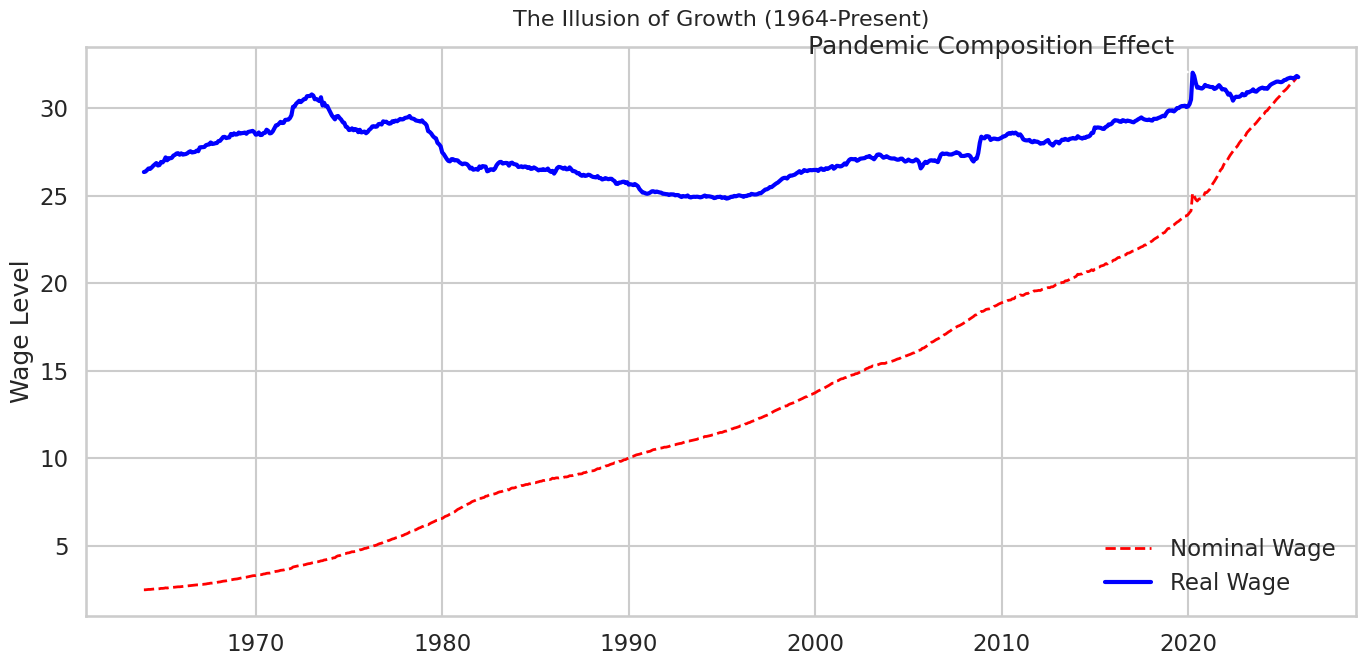

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure data is sorted by date (important for time series)
df = df.sort_index()

fig, ax = plt.subplots(figsize=(14, 7))

# Plot lines with required styles
ax.plot(df.index, df["Nominal_Wage"],
        linestyle="--", color="red", linewidth=2,
        label="Nominal Wage")

ax.plot(df.index, df["Real_Wage"],
        linestyle="-", color="blue", linewidth=3,
        label="Real Wage")

# Title
ax.set_title("The Illusion of Growth (1964-Present)", fontsize=16, pad=15)

# Annotation for 2020 spike in Real Wage
mask_2020 = (df.index >= pd.Timestamp("2020-01-01")) & (df.index <= pd.Timestamp("2020-12-31"))
real_2020 = df.loc[mask_2020, "Real_Wage"].dropna()

if not real_2020.empty:
    spike_date = real_2020.idxmax()
    spike_value = real_2020.max()

    y_range = df["Real_Wage"].max() - df["Real_Wage"].min()
    offset = 0.15 * y_range if y_range != 0 else 1

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(spike_date, spike_value),
        xytext=(spike_date - pd.Timedelta(days=365), spike_value + offset),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        ha="right"
    )

# Labels & legend
ax.set_xlabel("")
ax.set_ylabel("Wage Level")
ax.legend(frameon=False)

plt.tight_layout()
plt.show()
